Loading the saved model

In [1]:
from keras.models import load_model
model = load_model('trained_Inceptionv3.h5')

Loading test data


In [2]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1/255)
test_dir = "C:/Users/jaimi/Downloads/AMLP/Repo/satellite-data_splitted/test"
test_generator = test_datagen.flow_from_directory(test_dir, shuffle=False,
                                                              target_size=(256,256),
                                                              class_mode='categorical')

Found 2505 images belonging to 35 classes.


In [3]:
trueClass = test_generator.classes[test_generator.index_array]

In [4]:
import numpy as np
#sensitivity, specificity, precision, recall, f1_score
def calculate(y_test, y_pred_test):
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)
    
    # Calculate Sensitivity, Specificity, Precision, Recall, F1 Score
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    precision = np.sum(true_pos) / (np.sum(true_pos) + np.sum(false_pos))
    recall = np.sum(true_pos) / (np.sum(true_pos) + np.sum(false_neg))
    f1_score = 2*((precision*recall) / (precision+recall))
    
    return sensitivity, specificity, precision, recall, f1_score

In [5]:
import os
classes = os.listdir(test_dir)
main_dir = os.listdir(test_dir)
testing_dir_list=[]
label_list=[]
for folder_id in range(len(classes)):
    for filename in os.listdir(test_dir + '/' + classes[folder_id]):
        file = classes[folder_id] + '/' + filename
        testing_dir_list.append(file)
        if(main_dir[folder_id] == 'airplane'):
            label_list.append(0)
        elif(main_dir[folder_id] == 'airport_runway'):
            label_list.append(1)
        elif (main_dir[folder_id] == 'artificial_grassland'):
            label_list.append(2)    
        elif (main_dir[folder_id] == 'avenue'):
            label_list.append(3)
        elif(main_dir[folder_id] == 'bare_land'):
            label_list.append(4)
        elif (main_dir[folder_id] == 'bridge'):
            label_list.append(5)    
        elif (main_dir[folder_id] == 'city_building'):
            label_list.append(6)
        elif(main_dir[folder_id] == 'coastline'):
            label_list.append(7)
        elif (main_dir[folder_id] == 'container'):
            label_list.append(8)    
        elif (main_dir[folder_id] == 'crossroads'):
            label_list.append(9)
        elif(main_dir[folder_id] == 'dam'):
            label_list.append(10)
        elif (main_dir[folder_id] == 'desert'):
            label_list.append(11)    
        elif (main_dir[folder_id] == 'dry_farm'):
            label_list.append(12)
        elif(main_dir[folder_id] == 'forest'):
            label_list.append(13)
        elif (main_dir[folder_id] == 'green_farmland'):
            label_list.append(14)    
        elif (main_dir[folder_id] == 'highway'):
            label_list.append(15)
        elif(main_dir[folder_id] == 'hirst'):
            label_list.append(16)
        elif (main_dir[folder_id] == 'lakeshore'):
            label_list.append(17)    
        elif (main_dir[folder_id] == 'mangrove'):
            label_list.append(18)
        elif(main_dir[folder_id] == 'marina'):
            label_list.append(19)
        elif (main_dir[folder_id] == 'mountain'):
            label_list.append(20)    
        elif (main_dir[folder_id] == 'parkinglot'):
            label_list.append(21)
        elif(main_dir[folder_id] == 'pipeline'):
            label_list.append(22)
        elif (main_dir[folder_id] == 'residents'):
            label_list.append(23)    
        elif (main_dir[folder_id] == 'river'):
            label_list.append(24)
        elif(main_dir[folder_id] == 'river_protection_forest'):
            label_list.append(25)
        elif (main_dir[folder_id] == 'sandbeach'):
            label_list.append(26)    
        elif (main_dir[folder_id] == 'sapling'):
            label_list.append(27)
        elif(main_dir[folder_id] == 'sea'):
            label_list.append(28)
        elif (main_dir[folder_id] == 'shrubwood'):
            label_list.append(29)    
        elif (main_dir[folder_id] == 'snow_mountain'):
            label_list.append(30)
        elif(main_dir[folder_id] == 'sparse_forest'):
            label_list.append(31)
        elif (main_dir[folder_id] == 'storage_room'):
            label_list.append(32)    
        elif (main_dir[folder_id] == 'stream'):
            label_list.append(33)
        elif(main_dir[folder_id] == 'town'):
            label_list.append(34)

import pandas as pd
data={'image':testing_dir_list, 'label':label_list}
df = pd.DataFrame(data)

In [6]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm,
                      target_names,
                      title='Confusion matrix',
                      cmap=None,
                      normalize=True):

    FONT_SIZE = 8

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8*2, 6*2))    # 8, 6
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90, fontsize=FONT_SIZE)
        plt.yticks(tick_marks, target_names, fontsize=FONT_SIZE)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                    horizontalalignment="center",
                    fontsize=FONT_SIZE,
                    color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    fontsize=FONT_SIZE,
                    color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclassification rate={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [7]:
from sklearn.metrics import confusion_matrix,classification_report
Y_pred = model.predict(test_generator)
true_classes=df['label']
print(classification_report(true_classes,Y_pred.argmax(axis=1)))

79/79 [==============================] - 48s 595ms/step
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.91      0.99      0.94        69
           2       0.90      0.97      0.93        29
           3       0.96      0.96      0.96        55
           4       0.92      0.94      0.93        87
           5       0.88      0.96      0.92        48
           6       0.95      0.93      0.94       102
           7       0.92      0.94      0.93        47
           8       1.00      0.98      0.99        66
           9       0.98      0.98      0.98        56
          10       0.96      0.70      0.81        33
          11       0.94      0.99      0.96       110
          12       1.00      1.00      1.00       132
          13       0.99      0.95      0.97       109
          14       0.98      0.95      0.97        65
          15       0.95      0.87      0.91        23
          16       0.95  

Confusion Matrix

Confusion Matrix


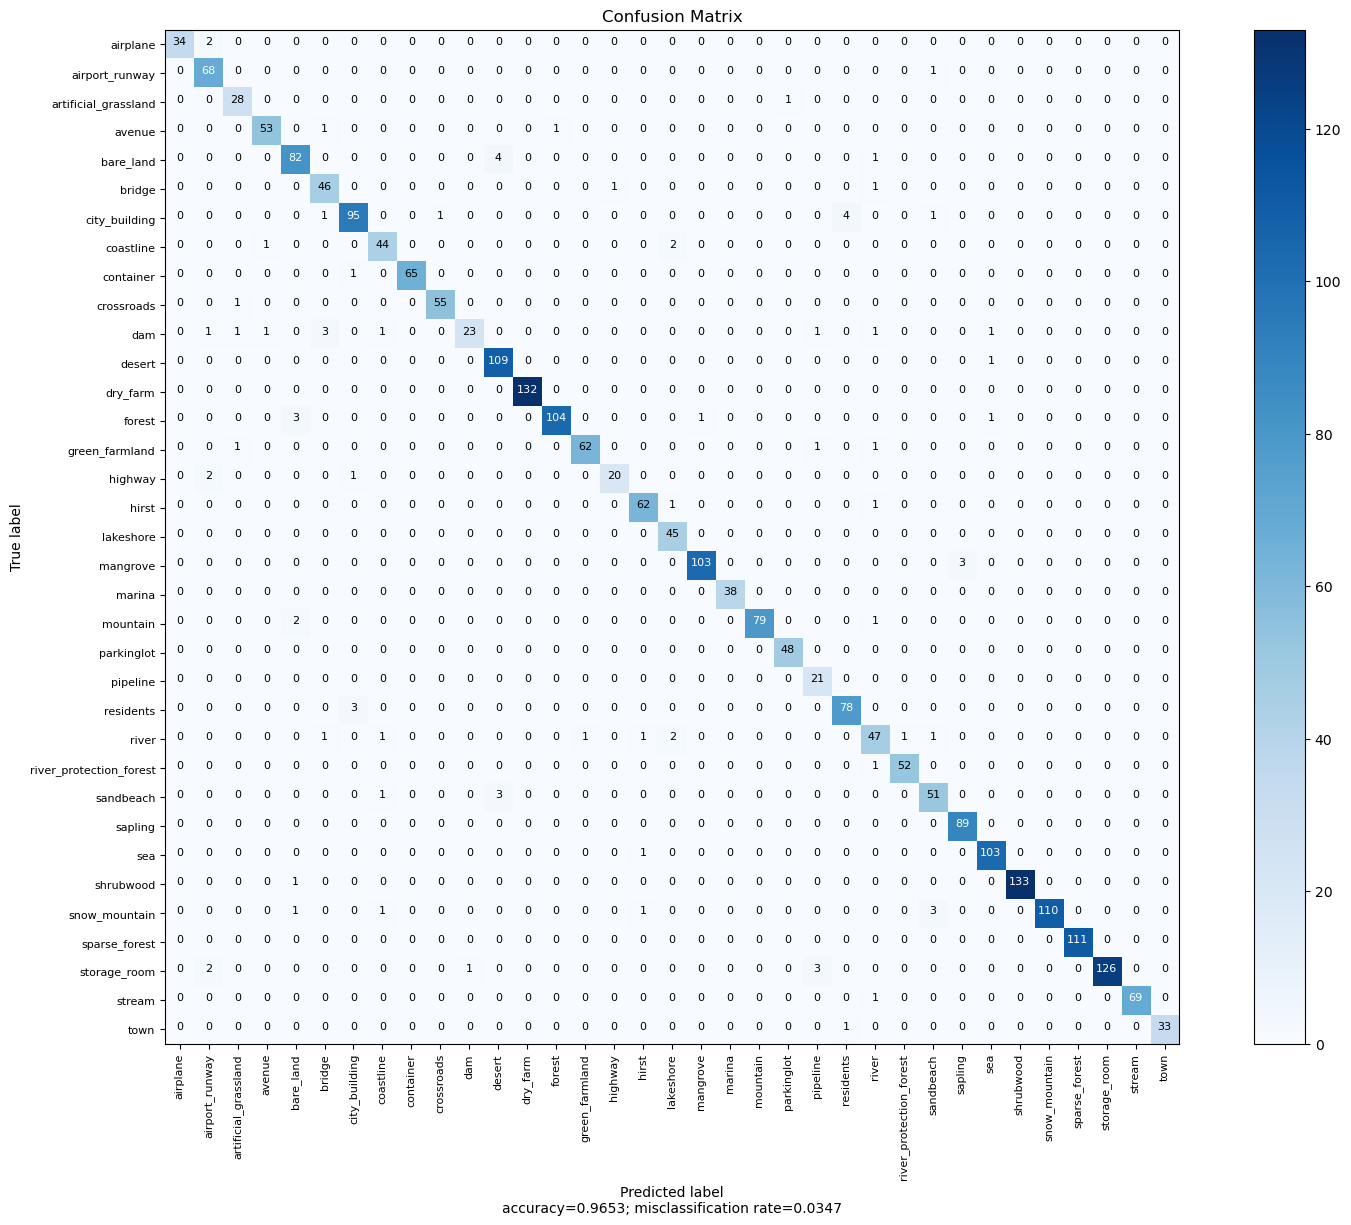

In [8]:
print('Confusion Matrix')
cm=confusion_matrix(true_classes,Y_pred.argmax(axis=1))
cm
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix')

Display Predictions

In [9]:
import cv2
classes = os.listdir(test_dir)


def predict_classes(link): 
    
    img = cv2.imread(link)
    
    img = cv2.resize(img,(224,224))
    img = img/255
    img = img.reshape(-1,224,224,3)    # -1 is  for reshaping basically 
    
    pred = np.round(model.predict(img)).argmax(axis = 1)
    dic = {0: 'airplane', 1: 'airport_runway', 2: 'artificial_grassland', 3: 'avenue', 4: 'bare_land', 5: 'bridge', 6: 'city_building', 7: 'coastline',
          8: 'container', 9: 'crossroads', 10: 'dam', 11: 'desert', 12: 'dry_farm', 13: 'forest', 14: 'green_farmland', 15: 'highway', 16: 'hirst',
          17: 'lakeshore', 18: 'mangrove', 19: 'marina', 20: 'mountain', 21: 'parkinglot', 22: 'pipeline', 23: 'residents', 24: 'river', 25: 'river_protection_forest',
          26: 'sandbeach', 27: 'sapling', 28: 'sea', 29: 'shrubwood', 30: 'snow_mountain', 31: 'sparse_forest', 32: 'storage_room', 33: 'stream', 34: 'town'}
    predicted = dic.get(int(pred))
    
    #print(predicted)
    
    return predicted,pred,classes[int(pred)]


[]
1/1 [==============================] - 1s 831ms/step
mountain
1/1 [==============================] - 0s 95ms/step
parkinglot
1/1 [==============================] - 0s 113ms/step
desert
1/1 [==============================] - 0s 138ms/step
mangrove
1/1 [==============================] - 0s 143ms/step
river
1/1 [==============================] - 0s 149ms/step
snow_mountain
1/1 [==============================] - 0s 127ms/step
desert
1/1 [==============================] - 0s 120ms/step
crossroads
1/1 [==============================] - 0s 108ms/step
dry_farm
1/1 [==============================] - 0s 68ms/step
airplane
1/1 [==============================] - 0s 132ms/step
crossroads
1/1 [==============================] - 0s 147ms/step
desert
1/1 [==============================] - 0s 88ms/step
forest
1/1 [==============================] - 0s 113ms/step
container
1/1 [==============================] - 0s 134ms/step
marina
1/1 [==============================] - 0s 127ms/step


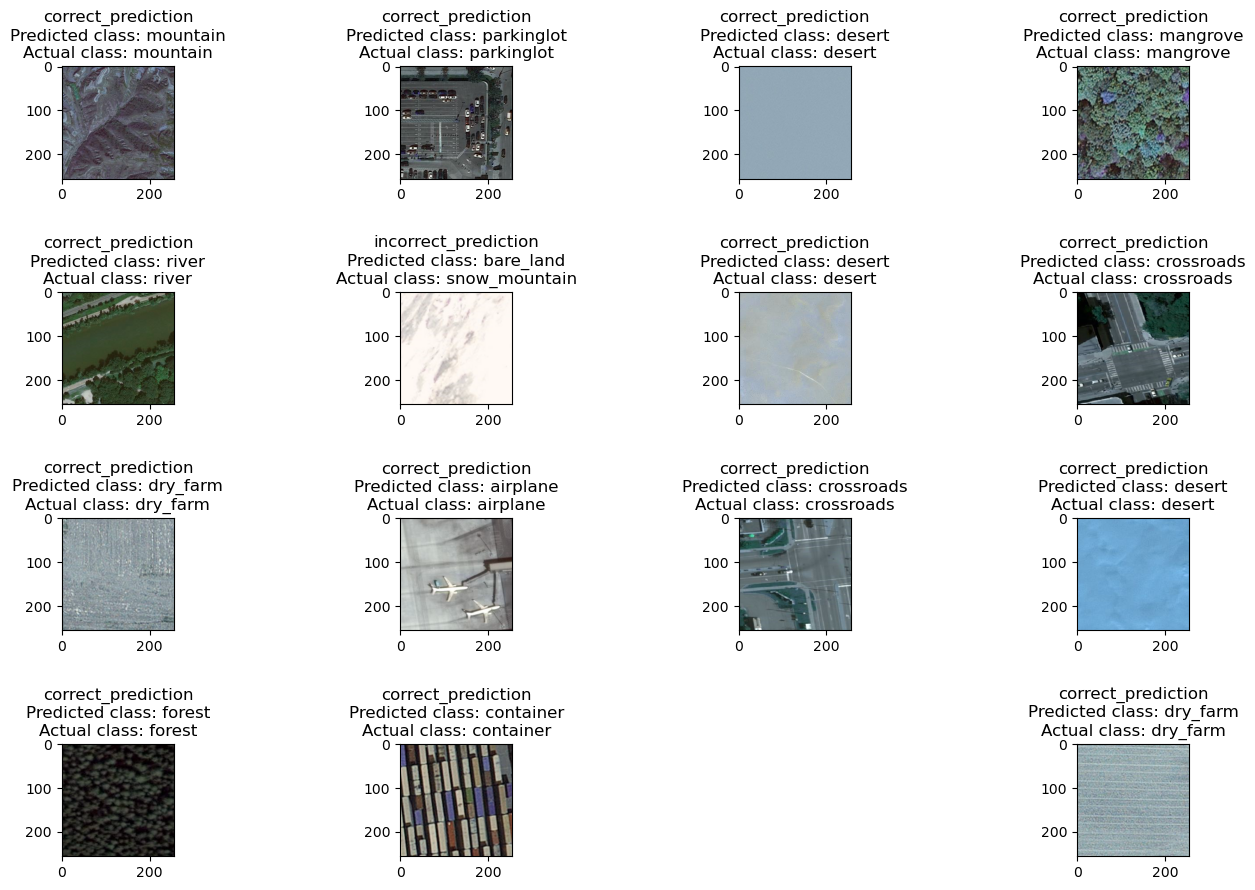

In [10]:
import random
from PIL import Image 

images = []
test_class = []
for folder in os.listdir(test_dir):
  for image in os.listdir(test_dir + '/' + folder):
    images.append(os.path.join(test_dir, folder, image))
    
 


plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(16):
  print(test_class)
  n += 1
  
  random_img = random.choice(images)
  path = os.path.dirname(random_img)
  test_class = (os.path.basename(path))
  imgs = cv2.imread(random_img)
  plt.subplot(4, 4, n)
  pred,pred_class,actual = predict_classes(random_img)
  
  if pred == test_class:
    plt.title("correct_prediction\nPredicted class: "+pred+"\nActual class: "+test_class)
  else:
     plt.title("\nincorrect_prediction\nPredicted class: "+pred+"\nActual class: "+test_class)

  #plt.title("Predicted: "+pred+"\nActual Class: "+ actual)
  plt.imshow(imgs)
  plt.tight_layout()
  #print()
plt.show()